In [1]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [2]:
# Read csv
raw_data = pd.read_csv(
    'Resources/data.csv',
    parse_dates=True,
    infer_datetime_format=True,
    index_col='date_sold'
    )
raw_data

,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid
date_sold,,,,,,,,,,
2018-09-18,NaN,Darling Point,Sydney,NSW,-33.869565,151.241317,3,unit,NSW1221,NSW180
2018-09-24,NaN,Darling Point,Sydney,NSW,-33.872179,151.239726,3,unit,NSW1221,NSW180
2018-09-26,1730000.0,Darling Point,Sydney,NSW,-33.868386,151.237471,2,unit,NSW1221,NSW180
2018-09-26,1928000.0,Darling Point,Sydney,NSW,-33.875465,151.236280,3,unit,NSW1221,NSW180
2018-10-02,1475000.0,Darling Point,Sydney,NSW,-33.875734,151.233575,3,unit,NSW1221,NSW180
...,...,...,...,...,...,...,...,...,...,...
2019-09-09,NaN,Taylor,Canberra,ACT,-35.152128,149.099435,3,townhouse,ACT934,ACT
2019-09-10,549900.0,Taylor,Canberra,ACT,-35.151968,149.107229,3,townhouse,ACT934,ACT
2019-09-10,499900.0,Taylor,Canberra,ACT,-35.151968,149.107229,3,townhouse,ACT934,ACT


In [3]:
# Remove nulls
raw_data.isnull().sum()
clean_data = raw_data.dropna()
geo_data = clean_data[["lat", "lon"]]
clean_data.drop(columns=['loc_pid', 'lga_pid', 'lat', 'lon', 'state'], inplace=True)
clean_data.dtypes

price            float64
suburb            object
city_name         object
bedrooms           int64
property_type     object
dtype: object

In [4]:
# Check data values
property_types = clean_data.property_type.unique()
number_of_bedrooms = clean_data.bedrooms.unique()
cities = clean_data.city_name.unique()
print(f"Property Types: {property_types}")
print(f"Number of bedrooms: {number_of_bedrooms}")
print(f"Cities: {cities}")

Property Types: ['unit' 'house' 'townhouse']
Number of bedrooms: [2 3 1 0 5 4]
Cities: ['Sydney' 'Melbourne' 'Perth' 'Adelaide' 'Brisbane' 'Canberra']


In [5]:
# Describe data
clean_data.price.describe()

count    2.577730e+05
mean     8.107030e+05
std      6.185909e+05
min      1.000000e+03
25%      4.860000e+05
50%      6.550000e+05
75%      9.200000e+05
max      1.000000e+08
Name: price, dtype: float64

In [6]:
# Groupbys to understand spread between different groups
city_averages = clean_data.groupby(["city_name"]).mean()
city_averages = city_averages.style.format({
    'price': '${:,.0f}'.format,
    'bedrooms':'{:.1f}'.format
})
city_averages

,price,bedrooms
city_name,,
Adelaide,"$496,324",3.1
Brisbane,"$679,791",3.2
Canberra,"$657,046",3.1
Melbourne,"$800,490",3.1
Perth,"$560,623",3.4
Sydney,"$1,124,057",3.0


In [7]:
# Groupbys to understand spread between different groups
bedroom_averages = clean_data.groupby(["bedrooms", "city_name"]).mean()
bedroom_averages = bedroom_averages.style.format({
    'price': '${:,.0f}'.format,
})
bedroom_averages

In [8]:
# Groupbys to understand spread between different groups
property_type_avgs = clean_data.groupby(["property_type"]).mean()
property_type_avgs = property_type_avgs.style.format({
    'price': '${:,.0f}'.format,
    'bedrooms':'{:.1f}'.format
})
property_type_avgs

,price,bedrooms
property_type,,
house,"$878,278",3.5
townhouse,"$729,508",2.9
unit,"$636,505",2.0


In [9]:
# Groupbys to understand spread between different groups
suburb_avgs = clean_data.groupby(["suburb"]).mean()
suburb_avgs = suburb_avgs.style.format({
    'price': '${:,.0f}'.format,
    'bedrooms':'{:.1f}'.format
})
suburb_avgs.data.loc["Endeavour Hills"]

price       635684.535980
bedrooms         3.431762
Name: Endeavour Hills, dtype: float64

In [10]:
# X = clean_data.drop(columns='price')
# X = (X - X.mean()) / X.std()
# X = np.c_[np.ones(X.shape[0]), X]
# y = clean_data.price
# y.shape

In [11]:
# from imblearn.under_sampling import RandomUnderSampler
# ros = RandomUnderSampler(random_state=1)
# X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
# y_resampled.shape

-   Tried to undersample as a means to reduce data rows to help with processing and fitting but to no success

In [12]:
# Since data set so huge trying out models on Melbourne subrubs only
melb_data = clean_data[clean_data['city_name'] == 'Melbourne']
melb_data.drop(columns="city_name", inplace=True)
melb_data.head()

,price,suburb,bedrooms,property_type
date_sold,,,,
2018-09-04,337500.0,Healesville,1,unit
2018-09-05,370000.0,Healesville,2,unit
2018-11-02,320000.0,Healesville,2,unit
2018-11-02,385000.0,Healesville,2,unit
2018-11-03,440000.0,Healesville,3,unit


In [13]:
# Splitting feautres 
melb_dummies = pd.get_dummies(melb_data[['suburb', 'property_type']])

In [14]:
# Train-test splitting 
dummy = pd.concat([melb_dummies, melb_data.bedrooms], axis=1)
X_train = dummy.loc['2018':'2019']
y_train = melb_data.price.loc['2018':'2019']
X_test = dummy.loc['2020']
y_test = melb_data.price.loc['2020']

,suburb_Abbotsford,suburb_Aberfeldie,suburb_Airport West,suburb_Albanvale,suburb_Albert Park,suburb_Albion,suburb_Alphington,suburb_Altona,suburb_Altona Meadows,suburb_Altona North,...,suburb_Yarra Junction,suburb_Yarrambat,suburb_Yarraville,suburb_Yellingbo,suburb_Yering,suburb_Yuroke,property_type_house,property_type_townhouse,property_type_unit,bedrooms
date_sold,,,,,,,,,,,,,,,,,,,,,
2018-09-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2018-09-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
2018-11-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
2018-11-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
2018-11-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
2019-07-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
2019-10-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,4


In [15]:
# Fit the data to linear model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [16]:
# Metrics
r2 = r2_score(y_test,  y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R2 Score: {r2}")
print(f"Root Mean Squared Error: {np.sqrt(mse)}")

R2 Score: -1.3888765284590956e+16
Root Mean Squared Error: 52040290793657.97


In [17]:
# Perform linear regression on lat/lon data 
idk = pd.concat([geo_data, clean_data.city_name], axis=1)
idk_melb = idk[idk['city_name'] == "Melbourne"]
idk_melb.drop(columns="city_name", inplace=True)
idk_melb

,lat,lon
date_sold,,
2018-09-04,-37.661765,145.510034
2018-09-05,-37.648961,145.522798
2018-11-02,-37.663509,145.509362
2018-11-02,-37.637402,145.497330
2018-11-03,-37.662562,145.509064
...,...,...
2019-07-08,-37.768046,145.052045
2019-10-28,-37.758452,145.056195
2019-11-22,-37.763377,145.053640


In [18]:
# Training and fitting data to linear model
X_train = idk_melb.loc['2018':'2019']
y_train = melb_data.price.loc['2018':'2019']
X_test = idk_melb.loc['2020']
y_test = melb_data.price.loc['2020']

scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


In [19]:
# Metrics
r2 = r2_score(y_test,  y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R2 Score: {r2}")
print(f"Root Mean Squared Error: {np.sqrt(mse)}")

R2 Score: -0.0004924444851446275
Root Mean Squared Error: 441687.18816193467


In [20]:
# Grouping by singular suburb and running linear model on that 
ehills = clean_data[clean_data["suburb"] == "Endeavour Hills"]
ehills_price = ehills.price
ehills.drop(columns=['price', 'suburb', 'city_name'], inplace=True)
dummy = pd.get_dummies(ehills.property_type, drop_first=True)
ehills_ml = pd.concat([ehills.bedrooms, dummy], axis=1)
ehills_ml

,bedrooms,townhouse,unit
date_sold,,,
2018-09-24,3,0,1
2018-09-24,2,0,1
2018-10-22,1,0,1
2018-11-07,2,0,1
2018-12-05,3,0,1
...,...,...,...
2020-04-08,3,1,0
2020-05-09,3,1,0
2020-05-20,2,1,0


In [21]:
# Split the data
X_train = ehills_ml.loc['2018':'2019']
y_train = ehills_price.loc['2018':'2019']
X_test = ehills_ml.loc['2020']
y_test = ehills_price.loc['2020']

In [22]:
# Fit the data 
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [23]:
r2 = r2_score(y_test,  y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R2 Score: {r2}")
print(f"Root Mean Squared Error: {np.sqrt(mse)}")

R2 Score: 0.41778505024989065
Root Mean Squared Error: 76392.44509993822


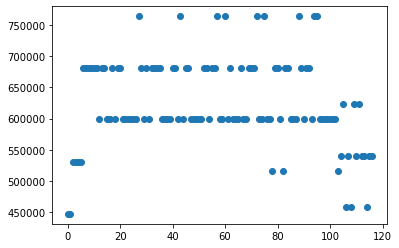

In [24]:
# Visualising the data
plt.scatter(range(len(y_test)), y_pred)

In [25]:
# Making linear predictive function (based from last grouping)

def predictPrice(suburb: str, property_type: str, number_of_bedrooms: int) -> float:

    df = clean_data[
        (clean_data.suburb == suburb) & 
        (clean_data.property_type == property_type)
        ]

    X = df.bedrooms.values.reshape(-1,1)
    y = df.price.values.reshape(-1,1)   

    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        random_state=78)

    model = LinearRegression()
    model.fit(X_train, y_train)
    
    print(f"${model.predict(np.full((1,1), number_of_bedrooms))[0][0]: .2f}")

In [26]:
# Function in action 
predictPrice("Surrey Hills", "townhouse", 2)      

$ 1025458.33


In [27]:
# Testing function 
df = clean_data[
        (clean_data.suburb == "Endeavour Hills") & 
        (clean_data.property_type == "house")
        ]

# X = pd.get_dummies(df.bedrooms, drop_first=True)
X = df.bedrooms.values.reshape(-1,1)
y = df.price.values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        random_state=78)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.predict(np.full((1,1), 3))[0][0]

605008.244511239

In [29]:
# In-sample Vs. Out-sample MSE
results = pd.DataFrame(y_test, columns=["Return"])
results["Predicted Return"] = y_pred

r2 = r2_score(y_test, y_pred)
out_sample_mse = mean_squared_error(
    results["Return"],
    results["Predicted Return"]
)
out_sample_rmse = np.sqrt(out_sample_mse)

in_sample = pd.DataFrame(y_train, columns=['Return'])
in_sample["In-sample Predictions"] = model.predict(X_train)

in_sample_mse = mean_squared_error(
    in_sample["Return"],
    in_sample["In-sample Predictions"]
)
in_sample_rmse = np.sqrt(in_sample_mse)

R2 Score: 0.5805195395958713
Out-sample RMSE: 57538.80797667537
In-sample RMSE: 71358.75677091467


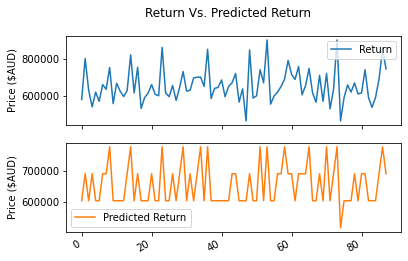

In [30]:
# Plotting return vs predicted return
results.plot(subplots=True,
             title='Return Vs. Predicted Return',
             ylabel='Price ($AUD)')
print(f"R2 Score: {r2}")
print(f"Out-sample RMSE: {out_sample_rmse}")
print(f"In-sample RMSE: {in_sample_rmse}")